In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("StressLevelDataset.csv")

# Descriptive Statistics

- 1) How many students are in the dataset?
- 2) What is the average anxiety level of students in the dataset?
- 3) How many students have reported a history of mental health issues?

In [4]:
# 1
num_students = len(df)

# 2
average_anxiety_level = df['anxiety_level'].mean()

# 3
students_with_mental_health_history = df[df['mental_health_history'] == 1]
num_students_with_mental_health_history = len(students_with_mental_health_history)

print("1) Number of students in the dataset:", num_students)
print("2) Average anxiety level of students:", average_anxiety_level)
print("3) Number of students with a history of mental health issues:", num_students_with_mental_health_history)

1) Number of students in the dataset: 1100
2) Average anxiety level of students: 11.063636363636364
3) Number of students with a history of mental health issues: 542


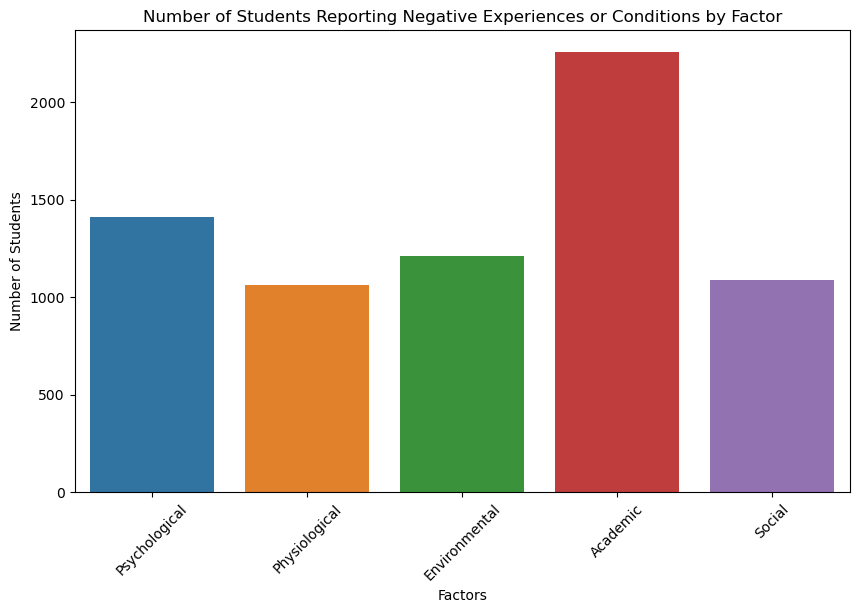

In [5]:
# Define the relevant columns
psychological_factors = ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression']
physiological_factors = ['headache', 'blood_pressure', 'sleep_quality', 'breathing_problem']
environmental_factors = ['noise_level', 'living_conditions', 'safety', 'basic_needs']
academic_factors = ['academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns']
social_factors = ['social_support', 'peer_pressure', 'extracurricular_activities', 'bullying']

# Calculate the number of students with negative experiences or conditions for each factor
num_students_with_negative_psychological = df[psychological_factors].apply(lambda x: x.lt(3).sum(), axis=1)
num_students_with_negative_physiological = df[physiological_factors].apply(lambda x: x.gt(3).sum(), axis=1)
num_students_with_negative_environmental = df[environmental_factors].apply(lambda x: x.gt(3).sum(), axis=1)
num_students_with_negative_academic = df[academic_factors].apply(lambda x: x.lt(3).sum(), axis=1)
num_students_with_negative_social = df[social_factors].apply(lambda x: x.gt(3).sum(), axis=1)

# Create a bar chart for the number of students with various negative experiences or conditions
factors = ['Psychological', 'Physiological', 'Environmental', 'Academic', 'Social']
negative_experiences = [
    num_students_with_negative_psychological.sum(),
    num_students_with_negative_physiological.sum(),
    num_students_with_negative_environmental.sum(),
    num_students_with_negative_academic.sum(),
    num_students_with_negative_social.sum()
]

plt.figure(figsize=(10, 6))
sns.barplot(x=factors, y=negative_experiences)
plt.title("Number of Students Reporting Negative Experiences or Conditions by Factor")
plt.xlabel("Factors")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)
plt.show()

# Psychological Factors

- 1) How many students have a self-esteem level below the average?
- 2) What percentage of students have reported experiencing depression?

In [6]:
# 1
average_self_esteem = df['self_esteem'].mean()
students_below_average_self_esteem = df[df['self_esteem'] < average_self_esteem]
num_students_below_average_self_esteem = len(students_below_average_self_esteem)


# 2
percentage_students_experiencing_depression = (df['depression'].sum() / num_students) * 100

print("1) Number of students with self-esteem below the average:", num_students_below_average_self_esteem)
print(f"2) Percentage of students experiencing depression: {percentage_students_experiencing_depression:.2f}%")

1) Number of students with self-esteem below the average: 507
2) Percentage of students experiencing depression: 1255.55%


# NOTE

- in order to have the percentage of students experience depression in a logical scale which is more understandable, we can set a threshold and create a new binary column

In [7]:
# Define the threshold and create the new binary column
threshold = 10
df['depression_binary'] = (df['depression'] > threshold).astype(int)

# Ensure 'num_students' is defined. If not, define it.
if 'num_students' not in locals():
    num_students = len(df)


percentage_students_experiencing_depression = (df['depression_binary'].sum() / num_students) * 100

print(f"2) Percentage of students experiencing depression: {percentage_students_experiencing_depression:.2f}%")

2) Percentage of students experiencing depression: 56.36%


# Physiological Factors

- 1) How many students experience headaches frequently?
- 2) What is the average blood pressure reading among the students?
- 3) How many students rate their sleep quality as poor?

In [8]:
# 1
students_with_frequent_headaches = df[df['headache'] == 1]
num_students_with_frequent_headaches = len(students_with_frequent_headaches)

# 2
average_blood_pressure = df['blood_pressure'].mean()

# 3
students_with_poor_sleep_quality = df[df['sleep_quality'] < 3]
num_students_with_poor_sleep_quality = len(students_with_poor_sleep_quality)

print("1) Number of students experiencing frequent headaches:", num_students_with_frequent_headaches)
print("2) Average blood pressure reading among the students:", average_blood_pressure)
print("3) Number of students with poor sleep quality:", num_students_with_poor_sleep_quality)

1) Number of students experiencing frequent headaches: 331
2) Average blood pressure reading among the students: 2.1818181818181817
3) Number of students with poor sleep quality: 550


# Environmental Factors

- 1) How many students live in conditions with high noise levels?
- 2) What percentage of students feel unsafe in their living conditions?
- 3) How many students have reported not having their basic needs met?

In [9]:
# 1
students_in_high_noise_conditions = df[df['noise_level'] > 3]
num_students_in_high_noise_conditions = len(students_in_high_noise_conditions)

# 2
percentage_students_feeling_unsafe = (df['safety'].sum() / num_students) * 100

# 3
students_without_basic_needs = df[df['basic_needs'] == 0]
num_students_without_basic_needs = len(students_without_basic_needs)

print("1) Number of students living in high noise conditions:", num_students_in_high_noise_conditions)
print("2) Percentage of students feeling unsafe in their living conditions:", percentage_students_feeling_unsafe)
print("3) Number of students without their basic needs met:", num_students_without_basic_needs)

1) Number of students living in high noise conditions: 274
2) Percentage of students feeling unsafe in their living conditions: 273.72727272727275
3) Number of students without their basic needs met: 40


# NOTE

- in order to have the Percentage of students feeling unsafe in their living conditions in a logical scale which is more understandable, we can set a threshold and create a new binary column (Like earlier we've created a column for depression)

In [10]:
# Create a binary column for safety (1 indicates feeling unsafe, 0 indicates feeling safe)
threshold_for_safety = 2
df['feeling_unsafe'] = (df['safety'] <= threshold_for_safety).astype(int)


percentage_students_feeling_unsafe = (df['feeling_unsafe'].sum() / num_students) * 100

print(f"2) Percentage of students feeling unsafe in their living conditions: {percentage_students_feeling_unsafe:.2f}%")

2) Percentage of students feeling unsafe in their living conditions: 51.36%


# Academic Factors

- 1) How many students rate their academic performance as below average?
- 2) What is the average study load reported by students?
- 3) How many students have concerns about their future careers?

In [11]:
# 1
students_below_average_academic_performance = df[df['academic_performance'] < 3]
num_students_below_average_academic_performance = len(students_below_average_academic_performance)

# 2
average_study_load = df['study_load'].mean()

# 3
students_with_future_career_concerns = df[df['future_career_concerns'] == 1]
num_students_with_future_career_concerns = len(students_with_future_career_concerns)

print("1) Number of students with below-average academic performance:", num_students_below_average_academic_performance)
print("2) Average study load reported by students:", average_study_load)
print("3) Number of students with concerns about their future careers:", num_students_with_future_career_concerns)

1) Number of students with below-average academic performance: 561
2) Average study load reported by students: 2.6218181818181816
3) Number of students with concerns about their future careers: 327


# Social Factors

- 1) How many students feel they have strong social support?
- 2) What percentage of students have experienced bullying?
- 3) How many students participate in extracurricular activities?

In [21]:
# 1
students_with_strong_social_support = df[df['social_support'] > 3]
num_students_with_strong_social_support = len(students_with_strong_social_support)

# 2
percentage_students_experiencing_bullying = (df['bullying'].sum() / num_students) * 100

# 3
students_participating_in_extracurricular = df[df['extracurricular_activities'] == 1]
num_students_participating_in_extracurricular = len(students_participating_in_extracurricular)

print("1) Number of students with strong social support:", num_students_with_strong_social_support)
print("2) Percentage of students experiencing bullying:", percentage_students_experiencing_bullying)
print("3) Number of students participating in extracurricular activities:", num_students_participating_in_extracurricular)

1) Number of students with strong social support: 0
2) Percentage of students experiencing bullying: 261.72727272727275
3) Number of students participating in extracurricular activities: 184


# NOTE

- in order to have the Percentage of students experiencing bullying in a logical scale which is more understandable, we can set a threshold and create a new binary column (Like earlier we've created a column for depression)

In [12]:
# Define the threshold and create the new binary column for bullying
bullying_threshold = 3
df['bullying_binary'] = (df['bullying'] > bullying_threshold).astype(int)

# Ensure 'num_students' is defined. If not, define it.
if 'num_students' not in locals():
    num_students = len(df)

# Compute the percentage using the new binary column
percentage_students_experiencing_bullying = (df['bullying_binary'].sum() / num_students) * 100

print(f"2) Percentage of students experiencing bullying: {percentage_students_experiencing_bullying:.2f}%")

2) Percentage of students experiencing bullying: 32.73%


# Comparative Analysis

- 1) Is there a correlation between anxiety level and academic performance?
- 2) Do students with poor sleep quality also report higher levels of depression?
- 3) Are students who experience bullying more likely to have a history of mental health issues?

In [13]:
# 1
correlation_anxiety_academic = df['anxiety_level'].corr(df['academic_performance'])

# 2
correlation_sleep_depression = df['sleep_quality'].corr(df['depression'])

# 3
students_with_bullying_history = df[df['bullying'] == 1]
students_with_bullying_history_and_mental_health_history = students_with_bullying_history[
    students_with_bullying_history['mental_health_history'] == 1]
percentage_students_with_bullying_and_mental_health_history = (
    len(students_with_bullying_history_and_mental_health_history) / len(students_with_bullying_history)) * 100

print("1) Correlation between anxiety level and academic performance:", correlation_anxiety_academic)
print("2) Correlation between sleep quality and depression:", correlation_sleep_depression)
print("3) Percentage of students with bullying history and mental health history:", percentage_students_with_bullying_and_mental_health_history)

1) Correlation between anxiety level and academic performance: -0.6496011296145088
2) Correlation between sleep quality and depression: -0.6931609071393334
3) Percentage of students with bullying history and mental health history: 4.179104477611941


# General Exploration

- 1) Which factor (Psychological, Physiological, Environmental, Academic, Social) has the highest number of students reporting negative experiences or conditions?
- 2) Are there any noticeable trends or patterns when comparing different factors?
- 3) Which specific feature within each factor has the most significant impact on student stress, based on the dataset?

In [14]:
# 1

factors = ['Psychological', 'Physiological', 'Environmental', 'Academic', 'Social']
negative_experiences = [num_students_below_average_self_esteem, 
                        num_students_with_frequent_headaches, 
                        num_students_in_high_noise_conditions, 
                        num_students_without_basic_needs, 
                        len(students_with_bullying_history)]
factor_with_most_negatives = factors[negative_experiences.index(max(negative_experiences))]

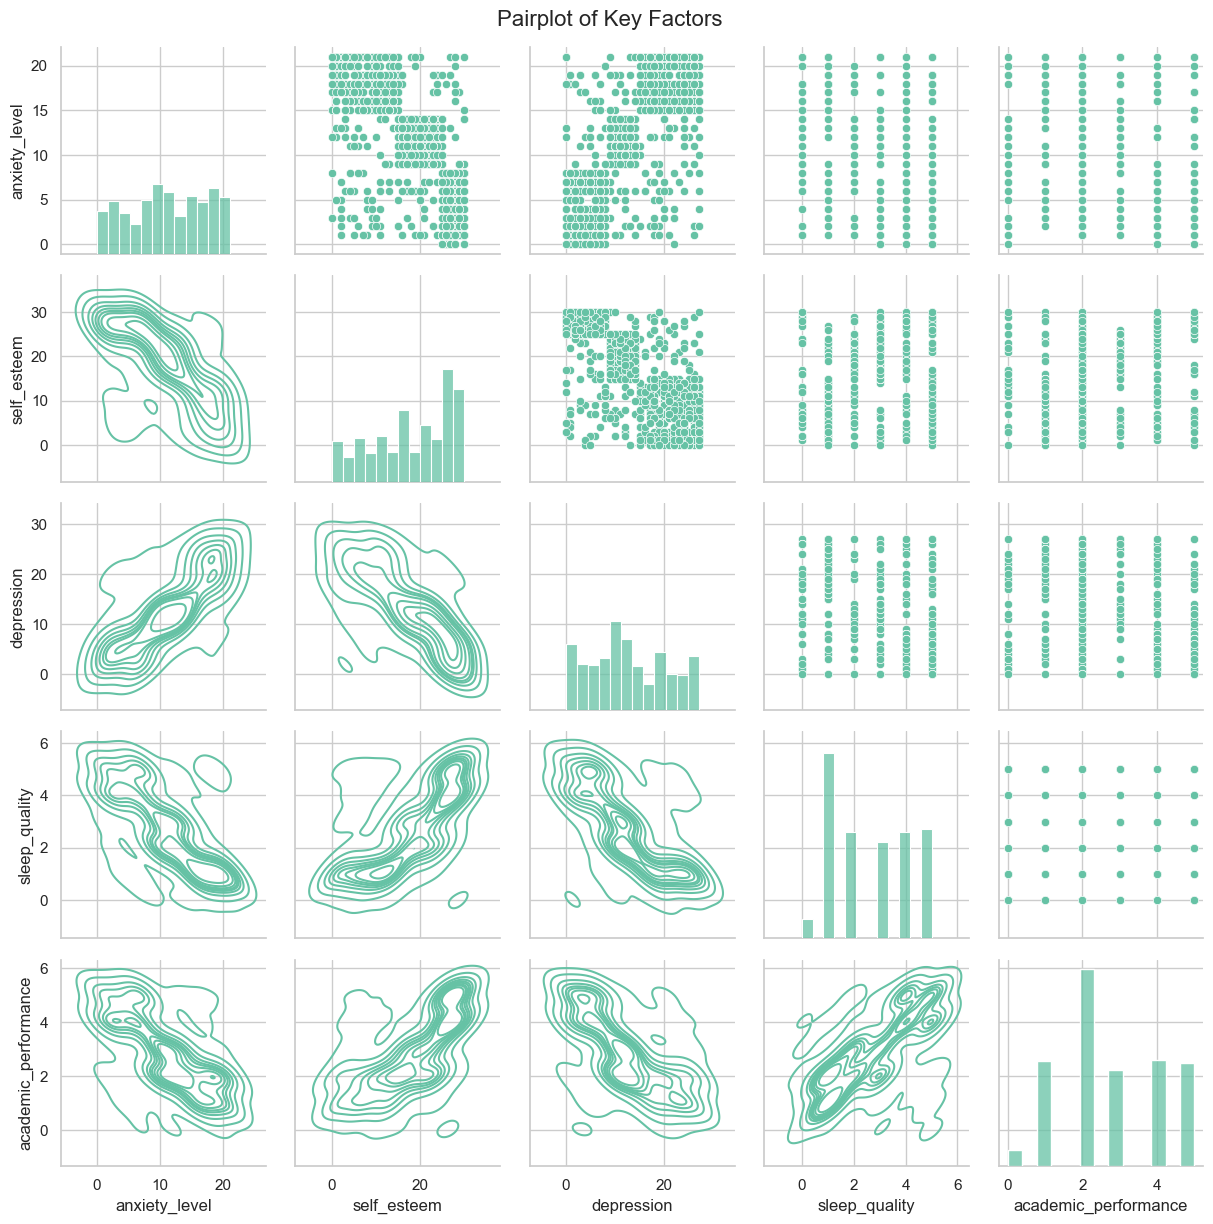

Factor: Psychological
- Feature: anxiety_level, Importance: 0.23497295126161322
- Feature: self_esteem, Importance: 0.5482609546474868
- Feature: mental_health_history, Importance: 0.020908217363434393
- Feature: depression, Importance: 0.1958578767274656

Factor: Physiological
- Feature: headache, Importance: 0.4022686526212743
- Feature: blood_pressure, Importance: 0.05253685052451986
- Feature: sleep_quality, Importance: 0.4749565555801484
- Feature: breathing_problem, Importance: 0.0702379412740575

Factor: Environmental
- Feature: noise_level, Importance: 0.14892001988304987
- Feature: living_conditions, Importance: 0.12215559145601257
- Feature: safety, Importance: 0.30949427654116807
- Feature: basic_needs, Importance: 0.41943011211976944

Factor: Academic
- Feature: academic_performance, Importance: 0.3958279275411725
- Feature: study_load, Importance: 0.10683844693247473
- Feature: teacher_student_relationship, Importance: 0.2586053678090752
- Feature: future_career_concerns, 

In [15]:
# 2&3

# Set a custom style for the plot
sns.set(style="whitegrid", palette="Set2")


factors_to_plot = df[['anxiety_level', 'self_esteem', 'depression', 'sleep_quality', 'academic_performance']]

g = sns.PairGrid(factors_to_plot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, colors="C0")
g.map_diag(sns.histplot, kde_kws={'color': 'C0'})


plt.subplots_adjust(top=0.95)
g.fig.suptitle("Pairplot of Key Factors", size=16)

# Show the plot
plt.show()



# use perform feature importance analysis To determine which specific feature within each factor has the most significant impact.

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

# Define factors
factors = ['Psychological', 'Physiological', 'Environmental', 'Academic', 'Social']

# Define feature sets for each factor

psychological_features = ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression']
physiological_features = ['headache', 'blood_pressure', 'sleep_quality', 'breathing_problem']
environmental_features = ['noise_level', 'living_conditions', 'safety', 'basic_needs']
academic_features = ['academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns']
social_features = ['social_support', 'peer_pressure', 'extracurricular_activities', 'bullying']

# Initialize a Random Forest Regressor
model = RandomForestRegressor()


feature_importance = {}

# Loop through each factor and analyze feature importance

for factor, features in zip(factors, [psychological_features, physiological_features, environmental_features, academic_features, social_features]):
    X = df[features]
    y = df['stress_level']

    model.fit(X, y)

    # Get feature importances
    importance = model.feature_importances_

    
    # Store feature importances in the dictionary
    
    feature_importance[factor] = {feature: importance_value for feature, importance_value in zip(features, importance)}


    # Print the feature importance for each factor

for factor, importance_dict in feature_importance.items():
    print(f"Factor: {factor}")
    for feature, importance_value in importance_dict.items():
        print(f"- Feature: {feature}, Importance: {importance_value}")
    print()

# Correlation Heatmap of Key Factors

- create a heatmap to visualize correlations between key factors. This helps you identify strong positive or negative relationships

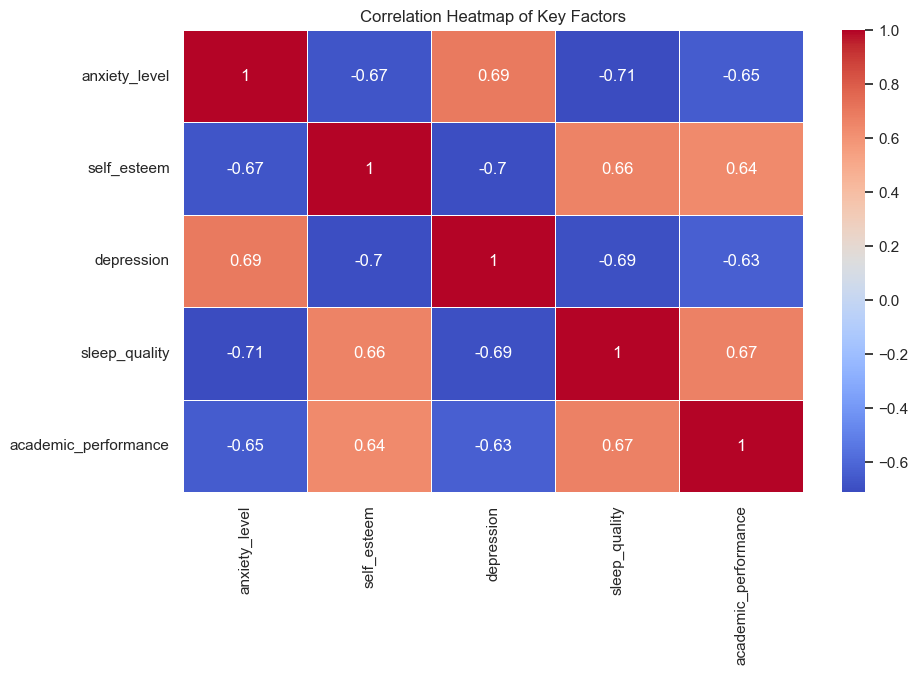

In [16]:
correlation_matrix = df[['anxiety_level', 'self_esteem', 'depression', 'sleep_quality', 'academic_performance']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Key Factors")
plt.show()

# Box Plots

- use box plots to identify trends and variations in factors. This is useful for comparing distributions

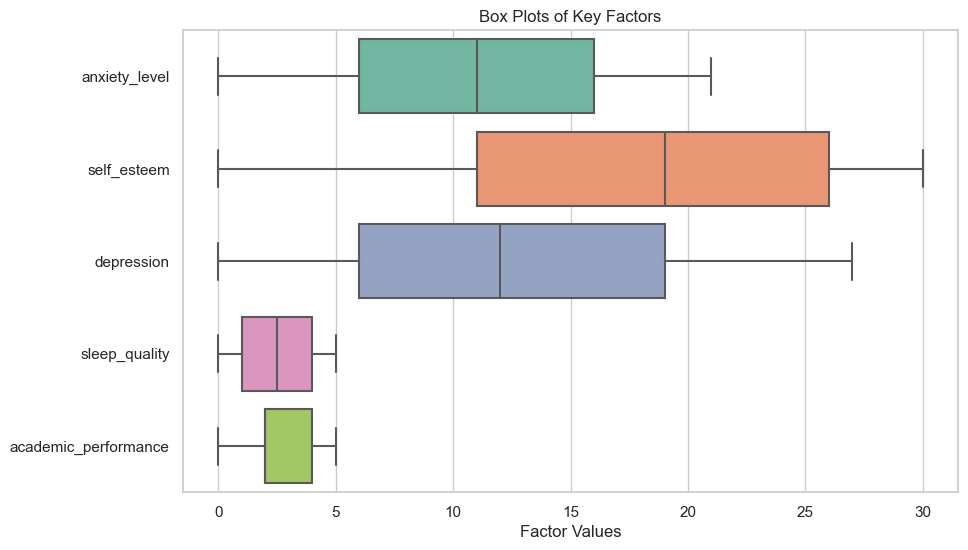

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['anxiety_level', 'self_esteem', 'depression', 'sleep_quality', 'academic_performance']], orient='h')
plt.title("Box Plots of Key Factors")
plt.xlabel("Factor Values")
plt.show()

# Determining Specific Feature Impact

- To visualize feature importance within each factor, create bar charts for each factor's features.

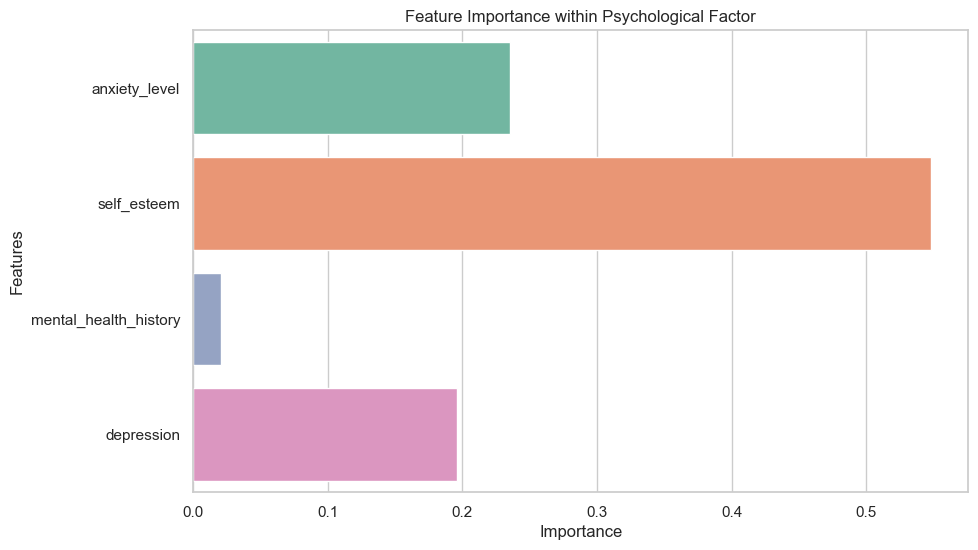

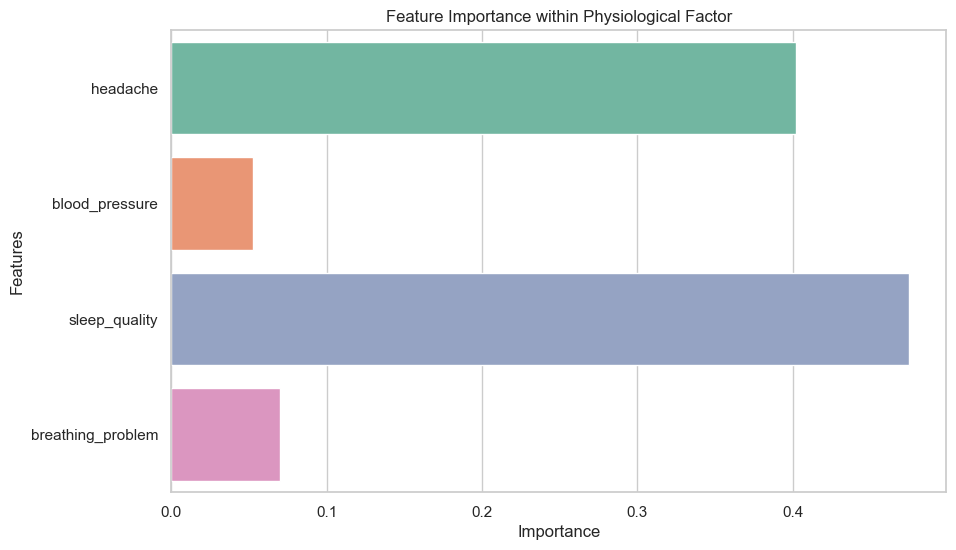

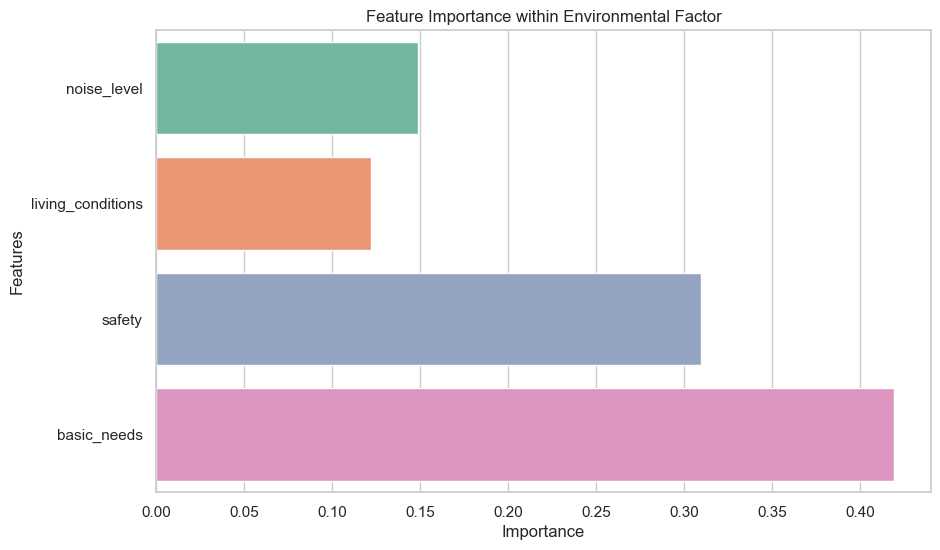

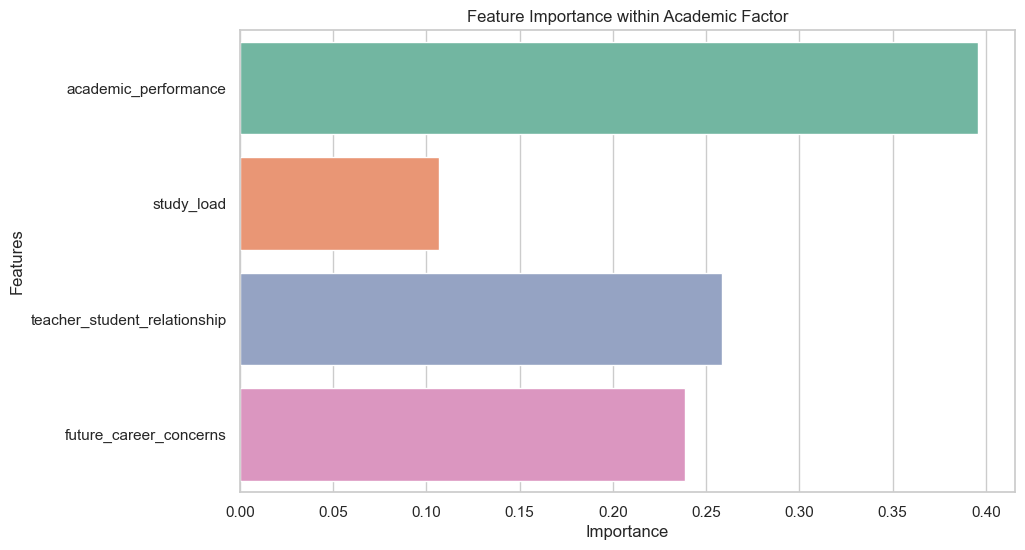

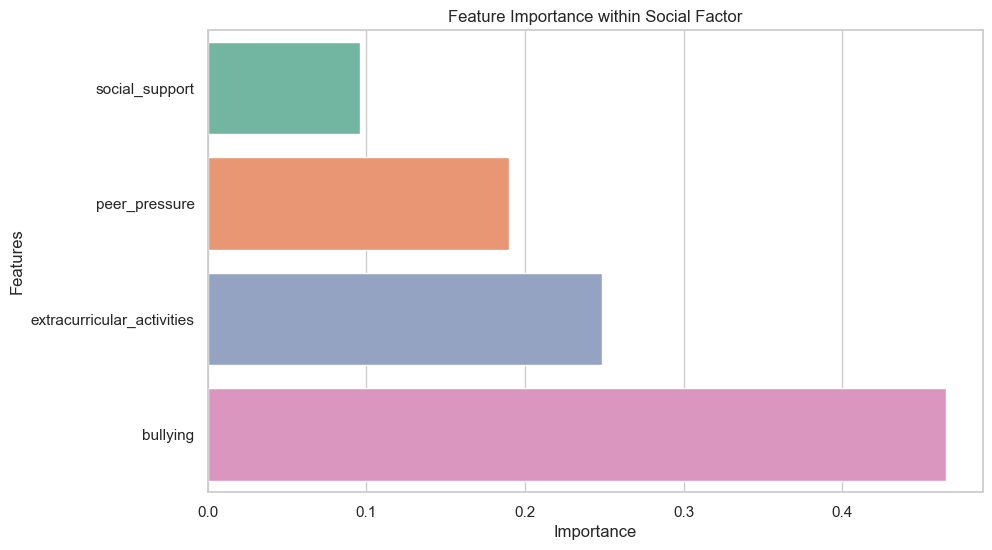

In [18]:
# Define feature importance for each factor

psychological_feature_importance = feature_importance['Psychological']
physiological_feature_importance = feature_importance['Physiological']
environmental_feature_importance = feature_importance['Environmental']
academic_feature_importance = feature_importance['Academic']
social_feature_importance = feature_importance['Social']



# Create bar charts for feature importance within each factor

def plot_feature_importance(factor_name, importance_dict):
    features = list(importance_dict.keys())
    importance = list(importance_dict.values())
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importance, y=features, orient='h')
    plt.title(f"Feature Importance within {factor_name} Factor")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

plot_feature_importance('Psychological', psychological_feature_importance)
plot_feature_importance('Physiological', physiological_feature_importance)
plot_feature_importance('Environmental', environmental_feature_importance)
plot_feature_importance('Academic', academic_feature_importance)
plot_feature_importance('Social', social_feature_importance)

In [19]:
import sklearn
from imblearn.over_sampling import RandomOverSampler
import sklearn.ensemble as ek
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import joblib

In [20]:
data = pd.read_csv('StressLevelDataset.csv')
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [21]:
X = data.drop('stress_level', axis=1)
y = data['stress_level']

# Initialize RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

# Fit and transform the data
X_oversampled, y_oversampled = oversampler.fit_resample(X, y)

# Create a new balanced dataset
balanced_data = pd.concat([X_oversampled, y_oversampled], axis=1)

# Print the value counts of the target variable before and after oversampling
print("Before Oversampling:")
print(y.value_counts())
print("After Oversampling:")
print(y_oversampled.value_counts())

Before Oversampling:
stress_level
0    373
2    369
1    358
Name: count, dtype: int64
After Oversampling:
stress_level
1    373
2    373
0    373
Name: count, dtype: int64


C:\Users\Malik\anaconda3\Lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
C:\Users\Malik\anaconda3\Lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [22]:
df_corr = balanced_data.corr()
df_corr

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
anxiety_level,1.000000,-0.670551,0.633116,0.692186,0.628370,0.330433,-0.710703,0.560938,0.605188,-0.566733,...,-0.634998,-0.640668,0.583866,-0.661731,0.715584,-0.566977,0.641201,0.638995,0.711109,0.736371
self_esteem,-0.670551,1.000000,-0.594247,-0.695611,-0.620852,-0.514245,0.662039,-0.504650,-0.574010,0.545649,...,0.627391,0.632751,-0.568642,0.649375,-0.708074,0.676579,-0.602133,-0.640851,-0.637738,-0.753768
mental_health_history,0.633116,-0.594247,1.000000,0.613874,0.601773,0.291892,-0.609586,0.461363,0.506653,-0.504869,...,-0.599587,-0.574634,0.528611,-0.578280,0.625584,-0.474030,0.577488,0.549123,0.618927,0.645798
depression,0.692186,-0.695611,0.613874,1.000000,0.654710,0.434852,-0.686886,0.523980,0.562695,-0.525038,...,-0.607355,-0.619900,0.600052,-0.669601,0.705715,-0.614294,0.636851,0.645327,0.662823,0.733361
headache,0.628370,-0.620852,0.601773,0.654710,1.000000,0.360536,-0.635407,0.457737,0.540242,-0.535477,...,-0.622339,-0.614905,0.539816,-0.614665,0.679266,-0.565904,0.618331,0.580031,0.599318,0.711571
blood_pressure,0.330433,-0.514245,0.291892,0.434852,0.360536,1.000000,-0.298784,0.157537,0.355597,-0.271803,...,-0.272977,-0.258428,0.346594,-0.351447,0.434013,-0.753719,0.396835,0.426835,0.368627,0.392375
sleep_quality,-0.710703,0.662039,-0.609586,-0.686886,-0.635407,-0.298784,1.000000,-0.535100,-0.575201,0.535693,...,0.619104,0.667124,-0.546864,0.671500,-0.678943,0.549144,-0.644209,-0.622932,-0.696370,-0.747628
breathing_problem,0.560938,-0.504650,0.461363,0.523980,0.457737,0.157537,-0.535100,1.000000,0.452799,-0.444320,...,-0.508148,-0.493981,0.426604,-0.497912,0.541876,-0.360647,0.496143,0.512494,0.575760,0.572864
noise_level,0.605188,-0.574010,0.506653,0.562695,0.540242,0.355597,-0.575201,0.452799,1.000000,-0.449886,...,-0.567896,-0.512448,0.489046,-0.536873,0.573175,-0.492995,0.575519,0.563440,0.581233,0.661400
living_conditions,-0.566733,0.545649,-0.504869,-0.525038,-0.535477,-0.271803,0.535693,-0.444320,-0.449886,1.000000,...,0.503384,0.502174,-0.434353,0.540141,-0.564895,0.461430,-0.495122,-0.512405,-0.541889,-0.579796


In [23]:
# Select features with strong correlations (both positive and negative)
strong_positive = df_corr['stress_level'][df_corr['stress_level'] > 0.7].index.tolist()
strong_negative = df_corr['stress_level'][df_corr['stress_level'] < -0.7].index.tolist()

# Combine both positive and negative features
selected_features = strong_positive + strong_negative

# Display selected features
print("Selected Features with Strong Correlation to Stress Level:", selected_features)

Selected Features with Strong Correlation to Stress Level: ['anxiety_level', 'depression', 'headache', 'future_career_concerns', 'bullying', 'stress_level', 'self_esteem', 'sleep_quality', 'safety', 'basic_needs', 'academic_performance']


In [24]:
# Drop 'stress_level' from the selected features list
selected_features.remove('stress_level')

# Display the updated list of selected features
print("Updated Selected Features with Strong Correlation to Stress Level:", selected_features)

Updated Selected Features with Strong Correlation to Stress Level: ['anxiety_level', 'depression', 'headache', 'future_career_concerns', 'bullying', 'self_esteem', 'sleep_quality', 'safety', 'basic_needs', 'academic_performance']


In [25]:
from sklearn.model_selection import train_test_split

# Define X (features) and y (target)
X = balanced_data[selected_features]  # Selecting only the strong correlated features
y = balanced_data['stress_level']      # Target variable (stress_level)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the splits to confirm
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (895, 10)
X_test shape: (224, 10)
y_train shape: (895,)
y_test shape: (224,)


In [26]:
# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(
    n_estimators=100,      # Number of decision trees
    random_state=42,       # Ensures reproducibility
    class_weight='balanced'  # Handles imbalanced classes if needed
)

# Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [27]:
# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.90625

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.89        74
           1       0.95      0.91      0.93        77
           2       0.89      0.92      0.91        73

    accuracy                           0.91       224
   macro avg       0.91      0.91      0.91       224
weighted avg       0.91      0.91      0.91       224


Confusion Matrix:
 [[66  2  6]
 [ 5 70  2]
 [ 4  2 67]]


In [28]:
cv_scores = cross_val_score(rf_classifier, X_test, y_test, cv=5, scoring='accuracy')

# Display the cross-validation scores and their mean
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

Cross-validation scores: [0.93333333 0.93333333 0.86666667 0.91111111 0.81818182]
Mean cross-validation score: 0.8925252525252525


In [29]:
# Initialize KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors (default is 5)

# Train the model
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [30]:
# Predict on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8973214285714286

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        74
           1       0.89      0.87      0.88        77
           2       0.89      0.92      0.91        73

    accuracy                           0.90       224
   macro avg       0.90      0.90      0.90       224
weighted avg       0.90      0.90      0.90       224



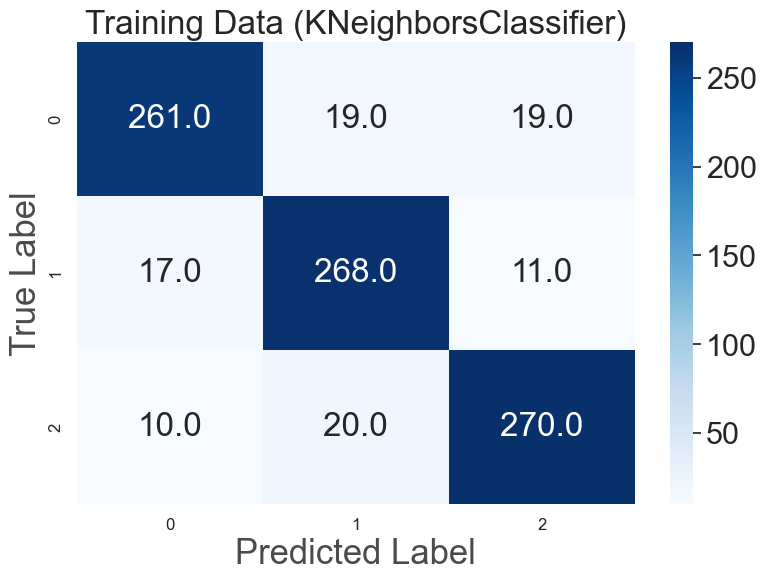

In [31]:
#Confusion Matrix of training data
y_pred_train=knn_classifier.predict(X_train)
cm=confusion_matrix(y_train,y_pred_train)

sns.set_style("darkgrid")
sns.set(font_scale=2)

f,ax = plt.subplots(figsize=(9,6))
ax.tick_params(labelsize=12)

sns.heatmap(cm, annot=True, fmt='.1f', cmap='Blues' ,ax=ax)

plt.title("Training Data (KNeighborsClassifier)")
plt.ylabel('True Label',fontsize=25, color="#4b4b4b")
plt.xlabel('Predicted Label', fontsize=25, color="#4b4b4b")
plt.show()

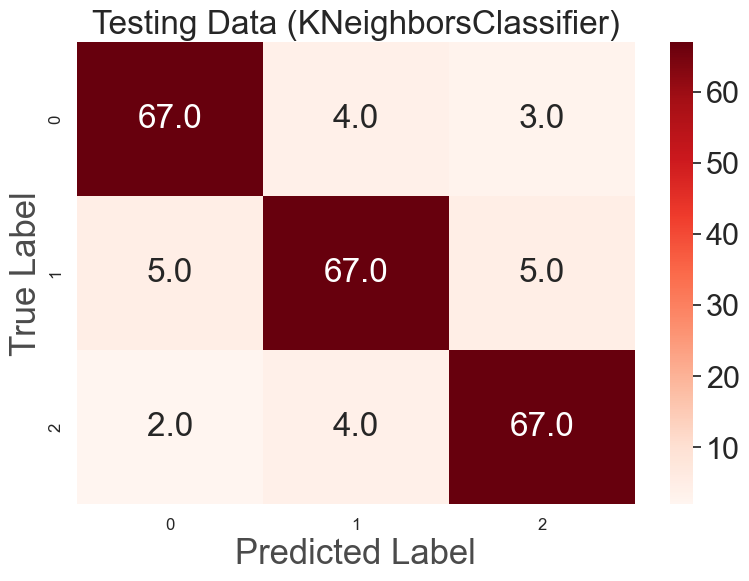

In [32]:
#Confusion Matrix of testing data
y_pred_test=knn_classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred_test)

sns.set_style("darkgrid")
sns.set(font_scale=2)

f,ax = plt.subplots(figsize=(9,6))
ax.tick_params(labelsize=12)

sns.heatmap(cm, annot=True, fmt='.1f', cmap='Reds' ,ax=ax)

plt.title("Testing Data (KNeighborsClassifier)")
plt.ylabel('True Label',fontsize=25, color="#4b4b4b")
plt.xlabel('Predicted Label', fontsize=25, color="#4b4b4b")
plt.show()

In [33]:
model = KNeighborsClassifier()

k = 5
scores = cross_val_score(model, X, y, cv=k)

print("Cross-validation scores:", scores)

mean_score = scores.mean()
std_dev = scores.std()
print("Mean score:", mean_score)
print("Standard deviation of scores:", std_dev)

Cross-validation scores: [0.88839286 0.875      0.84375    0.87053571 0.86995516]
Mean score: 0.8695267456758489
Standard deviation of scores: 0.014501922950394555


In [34]:
# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(
    criterion='gini',       # Use 'entropy' for information gain
    max_depth=None,         # Limit the depth of the tree (optional, e.g., max_depth=10)
    random_state=42,        # For reproducibility
    class_weight='balanced'  # Adjust for imbalanced classes (if applicable)
)

# Train the model
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [35]:
# Predict on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8794642857142857

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        74
           1       0.89      0.91      0.90        77
           2       0.89      0.86      0.88        73

    accuracy                           0.88       224
   macro avg       0.88      0.88      0.88       224
weighted avg       0.88      0.88      0.88       224


Confusion Matrix:
 [[64  4  6]
 [ 5 70  2]
 [ 5  5 63]]


In [36]:
# Initialize Support Vector Classifier
svc_classifier = SVC(
    kernel='rbf',       # Kernel type: 'linear', 'poly', 'rbf', 'sigmoid'
    C=1.75,              # Regularization parameter
    gamma='scale',      # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    decision_function_shape='ovr',  # One-vs-Rest for multi-class classification
    random_state=42
)

# Train the model
svc_classifier.fit(X_train, y_train)

SVC(C=1.75, random_state=42)

In [37]:
# Predict on the test set
y_pred = svc_classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8928571428571429

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.89      0.92        74
           1       0.91      0.87      0.89        77
           2       0.83      0.92      0.87        73

    accuracy                           0.89       224
   macro avg       0.90      0.89      0.89       224
weighted avg       0.90      0.89      0.89       224


Confusion Matrix:
 [[66  3  5]
 [ 1 67  9]
 [ 2  4 67]]


In [ ]:
#Save the model in .pkl format using joblib
joblib.dump(rf_classifier, 'random_forest_model.pkl')
print("Random Forest model exported as 'random_forest_model.pkl'.")